In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
pt = pd.read_csv('../data/total_raw/Release 13.1-public/data_clinical_patient.txt', sep='\t', index_col=0)
samp = pd.read_csv('../data/total_raw/Release 13.1-public/data_clinical_sample.txt', sep='\t', index_col=0)

In [4]:
#remove rows 0-3
pt = pt.iloc[4:]
pt.head()

,Sex,Primary Race,Ethnicity Category,Center,Interval in days from DOB to date of last contact,Interval in days from DOB to DOD,Year of last contact,Vital Status,Year of death
#Patient Identifier,,,,,,,,,
GENIE-VICC-101416,Female,White,Non-Spanish/non-Hispanic,VICC,19225,Not Applicable,2014,False,Not Applicable
GENIE-VICC-102225,Female,White,Non-Spanish/non-Hispanic,VICC,12057,12487,2015,True,2017
GENIE-VICC-102424,Female,White,Non-Spanish/non-Hispanic,VICC,23505,23625,2016,True,2016
GENIE-VICC-102966,Male,White,Non-Spanish/non-Hispanic,VICC,23426,23430,2015,True,2015
GENIE-VICC-103244,Female,Unknown,Unknown,VICC,18267,18311,2014,True,2014


In [5]:
#remove rows 0-3
samp = samp.iloc[4:]
samp.head()

,Sample Identifier,Age at Which Sequencing was Reported,Oncotree Code,Sample Type,Sequence Assay ID,Cancer Type,Cancer Type Detailed,Sample Type Detailed
#Patient Identifier,,,,,,,,
GENIE-VICC-101416,GENIE-VICC-101416-unk-1,52,MAAP,Primary,VICC-01-T7,Appendiceal Cancer,Mucinous Adenocarcinoma of the Appendix,Primary tumor
GENIE-VICC-102225,GENIE-VICC-102225-unk-1,31,READ,Metastasis,VICC-01-T7,Colorectal Cancer,Rectal Adenocarcinoma,Metastasis site unspecified
GENIE-VICC-102424,GENIE-VICC-102424-unk-1,63,SCCNOS,Metastasis,VICC-01-T7,Cancer of Unknown Primary,"Squamous Cell Carcinoma, NOS",Metastasis site unspecified
GENIE-VICC-102966,GENIE-VICC-102966-unk-1,64,LUAD,Metastasis,VICC-01-T7,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified
GENIE-VICC-103244,GENIE-VICC-103244-unk-1,50,IDC,Primary,VICC-01-T5A,Breast Cancer,Breast Invasive Ductal Carcinoma,Primary tumor


In [8]:
samp = samp.loc[samp['Cancer Type'].str.contains('colo', case=False, na=False) | samp['Cancer Type'].str.contains('rectal', case=False, na=False)]
samp.shape

(15526, 8)

In [9]:
samp['Sequence Assay ID'].value_counts()

Sequence Assay ID
MSK-IMPACT468         3464
DFCI-ONCOPANEL-3.1    1598
JHU-50GP              1187
MSK-IMPACT505         1077
MSK-IMPACT410          930
                      ... 
WAKE-CA-NGSQ3            3
VICC-02-XTV2             3
WAKE-CLINICAL-AB1        2
WAKE-CA-01               2
YALE-OCP-V2              1
Name: count, Length: 63, dtype: int64

In [10]:
panel_list = samp['Sequence Assay ID'].unique()
len(panel_list)

63

In [12]:
panel_path = '../data/total_raw/Release 13.1-public/gene_panels'

In [15]:
pan1 = pd.read_csv(os.path.join(panel_path, 'data_gene_panel_MSK-IMPACT341.txt'), sep='\t', skiprows=2)
pan1.head()

,gene_list:,NPM1,TRAF7,ERCC4,RAD51B,PPP2R1A,HIST1H3B,IL7R,HIST1H1C,DAXX,...,SDHB,RASA1,MPL,ASXL1,NBN,BCL2,PRKAR1A,TSHR,INPP4A,INPP4B


In [17]:
panel_dict = {}
for panel in panel_list:
    try:
        pan = pd.read_csv(os.path.join(panel_path, 'data_gene_panel_' + panel + '.txt'), sep='\t', skiprows=2)
        panel_dict[panel] = pan
    except FileNotFoundError:
        print(panel)
        print('File not found')

PROV-TRISEQ-V2
File not found


In [18]:
panel_cols = {}
for panel in panel_dict.keys():
    panel_cols[panel] = list(panel_dict[panel].columns)
panel_len = pd.DataFrame(columns=['panel', 'num_genes'])
for panel in panel_cols.keys():
    panel_len = pd.concat([panel_len, pd.DataFrame([[panel, len(panel_cols[panel])]], columns=['panel', 'num_genes'])])
panel_len.sort_values(by='num_genes', ascending=False)


,panel,num_genes
0,JHU-500STP,761
0,VICC-02-XTV4,650
0,VICC-02-XTV3,650
0,VICC-02-XTV2,594
0,UHN-555-V1,557
...,...,...
0,COLU-CSTP-V1,46
0,WAKE-CLINICAL-AB1,33
0,NKI-PATH-NGS,33
0,WAKE-CLINICAL-CF3,32


In [20]:
panel_len['num_samples'] = np.NaN
for panel in panel_len['panel']:
    panel_len.loc[panel_len['panel'] == panel, 'num_samples'] = samp.loc[samp['Sequence Assay ID'] == panel].shape[0]
panel_len.sort_values(by='num_samples', ascending=False)

,panel,num_genes,num_samples
0,MSK-IMPACT468,469,3464.0
0,DFCI-ONCOPANEL-3.1,448,1598.0
0,JHU-50GP,51,1187.0
0,MSK-IMPACT505,506,1077.0
0,MSK-IMPACT410,411,930.0
...,...,...,...
0,WAKE-CA-NGSQ3,497,3.0
0,VICC-02-XTV2,594,3.0
0,WAKE-CLINICAL-AB1,33,2.0
0,WAKE-CA-01,92,2.0


In [24]:
#for each gene in all the panels, count how many times it appears in a sample
gene_count = {}
for panel in panel_cols.keys():
    for gene in panel_cols[panel]:
        if gene not in gene_count.keys():
            gene_count[gene] = panel_len.loc[panel_len['panel'] == panel, 'num_samples'].values[0]
        else:
            new_panel_count = panel_len.loc[panel_len['panel'] == panel, 'num_samples'].values[0]
            gene_count[gene] += new_panel_count
gene_count = pd.DataFrame.from_dict(gene_count, orient='index', columns=['count'])
gene_count.sort_values(by='count', ascending=False)

,count
gene_list:,15485.0
KRAS,15479.0
PIK3CA,15477.0
NRAS,15477.0
BRAF,15473.0
...,...
IFITM1,1.0
IL6,1.0
PNP,1.0
GAS6,1.0


<Axes: >

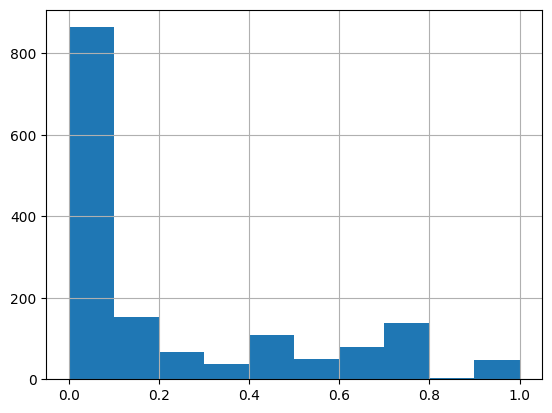

In [27]:
gene_count['frac'] = gene_count['count'] / gene_count['count'].max()
gene_count['frac'].hist()

In [30]:
len(gene_count.loc[gene_count['frac'] > 0.6])

266

In [31]:
gene_list = list(gene_count.loc[gene_count['frac'] > 0.6].index)

In [32]:
data = pd.DataFrame(columns=gene_list, index=samp.index)
data.shape

(15526, 266)

In [22]:
panel_len.sort_values(by='num_samples', ascending=True).head(10)

,panel,num_genes,num_samples
0,YALE-OCP-V2,134,1.0
0,WAKE-CA-01,92,2.0
0,WAKE-CLINICAL-AB1,33,2.0
0,WAKE-CA-NGSQ3,497,3.0
0,VICC-02-XTV2,594,3.0
0,WAKE-CLINICAL-T5A,69,4.0
0,NKI-PATH-NGS,33,4.0
0,VHIO-GENERAL-V01,57,6.0
0,WAKE-CLINICAL-CF3,32,6.0
0,UCHI-ONCOHEME55-V1,55,6.0


In [7]:
mut = pd.read_csv('../data/total_raw/Release 13.1-public/data_gene_matrix.txt', sep='\t', index_col=0)
mut.head()

,mutations,cna
SAMPLE_ID,,
GENIE-VICC-101416-unk-1,VICC-01-T7,VICC-01-T7
GENIE-VICC-102225-unk-1,VICC-01-T7,VICC-01-T7
GENIE-VICC-102424-unk-1,VICC-01-T7,VICC-01-T7
GENIE-VICC-102966-unk-1,VICC-01-T7,VICC-01-T7
GENIE-VICC-103244-unk-1,VICC-01-T5A,VICC-01-T5A
